<a href="https://colab.research.google.com/github/soju1jan/modoo/blob/master/10_Wine_Overfit_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Train on 652 samples, validate on 322 samples
Epoch 1/3500





652/652 [==============================] - 1s 1ms/step - loss: 0.5781 - acc: 0.7485 - val_loss: 0.5079 - val_acc: 0.7391
Epoch 2/3500
652/652 [==============================] - 0s 19us/step - loss: 0.5163 - acc: 0.7485 - val_loss: 0.4817 - val_acc: 0.7391
Epoch 3/3500
652/652 [==============================] - 0s 15us/step - loss: 0.4760 - acc: 0.7485 - val_loss: 0.4593 - val_acc: 0.7360
Epoch 4/3500
652/652 [==============================] - 0s 13us/step - loss: 0.4463 - acc: 0.7485 - val_loss: 0.4372 - val_acc: 0.7360
Epoch 5/3500
652/652 [==============================] - 0s 16us/step - loss: 0.4178 - acc: 0.7469 - val_loss: 0.4203 - val_acc: 0.7422
Epoch 6/3500
652/652 [==============================] - 0s 13us/step - loss: 0.4015 - acc: 0.7500 - val_loss: 0.4103 - val_acc: 0.7516
Epoch 7/3500
652/652 [==============================] - 0s 15us/step - loss: 0.3880 - acc: 0.7715 - val_loss: 0.4020 - val_acc: 0.7609
Ep

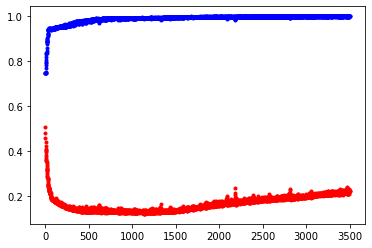

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

#df_pre = pd.read_csv('../dataset/wine.csv', header=None)
#df = df_pre.sample(frac=1)

# Github file path 는 http로 불려오므로 raw로 불러오기 위해서는 아래
url='https://raw.githubusercontent.com/soju1jan/modoo/master/wine_merge.csv'
df_pre = pd.read_csv(url, header=1)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 저장 폴더 설정 => 구글 드라이브에 저장
MODEL_DIR = '/content/drive/My Drive/10_colab_dataset/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="/content/drive/My Drive/10_colab_dataset/model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['acc']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()


